In [ ]:
import plotly.express as px
import pandas as pd
import numpy as np
import pingouin as pg
from scipy.stats import t
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats as stats
import math
%matplotlib inline

In [2]:
df = pd.DataFrame({"x" : [74, 86, 98, 102, 78, 84, 79, 70], 
                   'y': [70, 85, 90, 110, 71, 80, 69, 74]})

In [4]:
df['d'] = df.x - df.y

In [5]:
df.d.mean()

2.75

In [6]:
df.d.std()

6.158617655657106

In [7]:
error  = df.d.std()/np.sqrt(len(df))
error

2.1774001535251686

In [47]:
# We will find the test statistic for ttest

In [37]:
print("Test statistic : ", df.d.mean()/(df.d.std()/np.sqrt(len(df))))

Test statistic :  1.2629741003498156


In [48]:
# THIS gaussion is a plot to compare ttest distribution

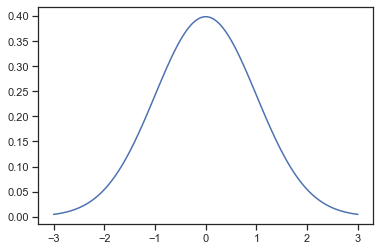

In [9]:
mu = 0
variance = 1
sigma = math.sqrt(variance)
x = np.linspace(mu - 3*sigma, mu + 3*sigma, 100)
plt.plot(x, stats.norm.pdf(x, mu, sigma))
plt.show()

In [49]:
# This is ttest distribution with 7 degree freedom. There reason we have only 8 sample, df = len(sample) - 1

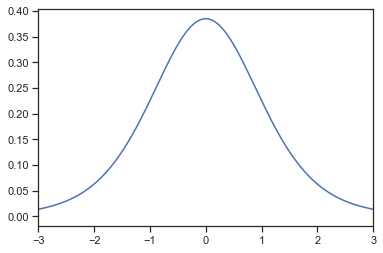

In [43]:
rv = t(df=7, loc=0, scale=1)
x = np.linspace(rv.ppf(0.0001), rv.ppf(0.9999), 1000)
y = rv.pdf(x)
plt.xlim(-3,3)
plt.plot(x,y)

In [50]:
# Here we take the integral of the value greater than 1.26 ttesy value we calculated from our sample set.

In [40]:
d = pd.DataFrame({'x': x, 'y':y})
d.y[d.x > 1.2629741003].sum()/d.y.sum()

0.12419468344829608

In [ ]:
# This is calculated from 3rd party library we get same result with our calcualtion

In [46]:
pg.ttest(df.x, df.y, paired=True, tail='one-sided').round(4)

,T,dof,tail,p-val,CI95%,cohen-d,BF10,power
T-test,1.263,7,greater,0.1235,"[-1.38, inf]",0.219,1.237,0.139


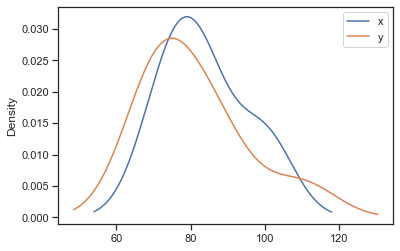

In [14]:
df.plot(kind='density')